# This notebook

In this notebook, we exlore the co-occurrence of keywords across the news articles to detect patterns of co-occurrence: which keywords tend to be discussed in the same context? 

## Settings

In [1]:
import os

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
from src.news_media.get_keywords_trend import *

/Users/alessiatosi/DS_projects/behavioural-sci-perception/docs/ext/keywords.yaml has been successfully loaded as a dict
<class 'dict'>


The config file

In [ ]:
CONFIG.keys()

## Import UK's news articles

In [7]:
news_uk = NewsArticles(country="uk")

`news_uk` is a `NewsArticles` class instance, with the following public attributes and methods:

In [ ]:
[d for d in dir(news_uk) if not d.startswith("_")]

`news_uk.data` contains the original dataset of articles:

In [8]:
news_uk.data.shape

(599, 12)

## Calculate raw occurrences of keywords per article

In [9]:
news_uk.kword_raw_tf

,,thaler,sunstein,kahneman,halpern,michie,chater,spi-b,nudge unit,behavioural insights team,behavioural science,...,paternalism,nanny state,voodoo science,police state,pandemic,epidemic,covid19,health emergency,behavioural fatigue,herd immunity
id,pub_date,,,,,,,,,,,,,,,,,,,,,
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2020-01-23,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2020-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
595,2020-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
596,2020-05-10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


## Calculate yes/no occurrence of keyword per article

Here we detect whether a keyword is mentioned in an article or not, regardless of how many times (in the same article).

In [10]:
news_uk.kword_yn_occurrence

,,thaler,sunstein,kahneman,halpern,michie,chater,spi-b,nudge unit,behavioural insights team,behavioural science,...,paternalism,nanny state,voodoo science,police state,pandemic,epidemic,covid19,health emergency,behavioural fatigue,herd immunity
id,pub_date,,,,,,,,,,,,,,,,,,,,,
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2020-01-23,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2020-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
595,2020-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
596,2020-05-10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### In how many articles has each keyword been mentioned in total?

In [11]:
news_uk.kword_yn_occurrence.sum(axis=0)

thaler                         7
sunstein                       5
kahneman                      24
halpern                       46
michie                       103
chater                         2
spi-b                          0
nudge unit                    58
behavioural insights team     53
behavioural science          196
behavioural scientist        165
behavioural insight           12
behaviour change              62
behavioural economics         21
behavioural economist         23
behavioural policy             0
behavioural analysis           3
behavioural analyst            3
psychologist                  67
psychology                    77
choice architecture            1
choice architect               0
nudge                         48
nudging                       22
nudge theory                  23
irrational behaviour           0
magic                          8
surveillance                  23
paternalism                    1
nanny state                    3
voodoo sci

### What proportion of articles has each keyword been mentioned in?

In [12]:
news_uk.kword_yn_occurrence.sum(axis=0) / news_uk.kword_yn_occurrence.shape[0]

thaler                       0.011686
sunstein                     0.008347
kahneman                     0.040067
halpern                      0.076795
michie                       0.171953
chater                       0.003339
spi-b                        0.000000
nudge unit                   0.096828
behavioural insights team    0.088481
behavioural science          0.327212
behavioural scientist        0.275459
behavioural insight          0.020033
behaviour change             0.103506
behavioural economics        0.035058
behavioural economist        0.038397
behavioural policy           0.000000
behavioural analysis         0.005008
behavioural analyst          0.005008
psychologist                 0.111853
psychology                   0.128548
choice architecture          0.001669
choice architect             0.000000
nudge                        0.080134
nudging                      0.036728
nudge theory                 0.038397
irrational behaviour         0.000000
magic       

## Co-occurrence of keywords

Here we use the "binary occurrence (yes/no)" of keywords in articles to compute a co-occurrence matrix. This answer the question: which keywords tend to appear together in the same article?

In [ ]:
news_uk.kword_yn_occurrence.values

In [13]:
coccur_matrix = news_uk.kword_yn_occurrence.values.T.dot(news_uk.kword_yn_occurrence.values)

In [14]:
np.fill_diagonal(coccur_matrix, 0)

In [ ]:
coccur_matrix

In [15]:
keywords_list = list(news_uk.kword_yn_occurrence.columns)

In [16]:
coccur_df = pd.DataFrame(coccur_matrix, index=keywords_list, columns=keywords_list)

In [ ]:
coccur_df

Let's display it, using a heatmap

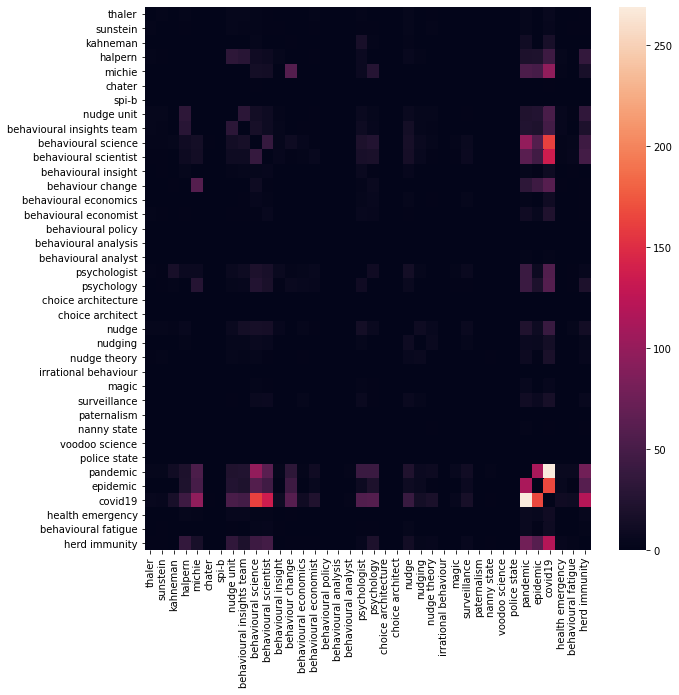

In [17]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(coccur_df, xticklabels=True, yticklabels=True)

Let's only consider the keywords more directly about behavioural science (i.e., no covid19 related)

In [18]:
behsci_kwords = [item for sublist in [CONFIG.get(key) for key in 
                     ['Actors', 'BehavSci', 'Nudge', 'Fatigue', 'Immunity']] for item in sublist] 

In [19]:
behsci_kwords = [col for col in coccur_df.columns if col in behsci_kwords]

In [20]:
behsci_coccur_df = coccur_df.loc[behsci_kwords, behsci_kwords] 

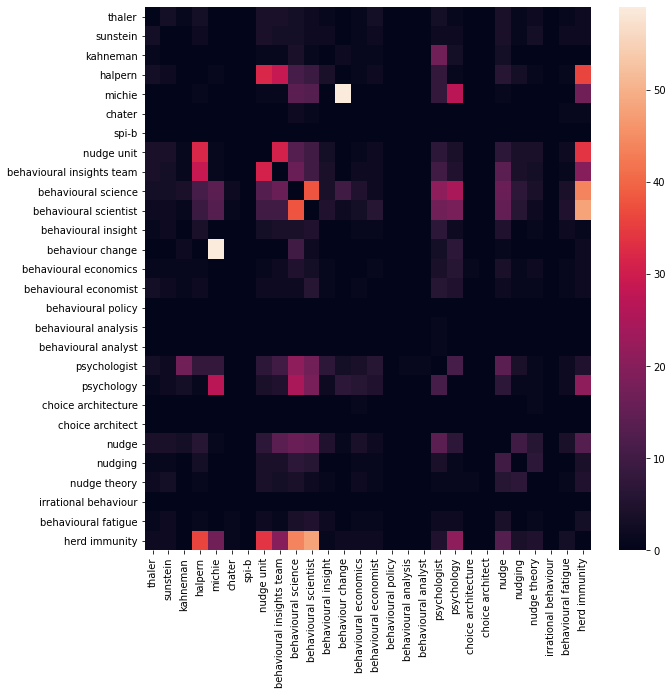

In [21]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(behsci_coccur_df, xticklabels=True, yticklabels=True)

# Network: exploring how keywords are interconnected

Let's use python's `networkx` library to plot the "connectedness" of keywords. This should give us an idea of what type of clusters of keywords exist in the articles.

In [22]:
#set 0 to lower triangular matrix, as it is redudent info (i.e., the matrix is symmetric around the digonal)
behsci_coccur_df.values[np.tril(np.ones(behsci_coccur_df.shape)).astype(np.bool)] = 0

In [ ]:
behsci_coccur_df

In [ ]:
# let's check that it worked as expected
sns.heatmap(behsci_coccur_df, xticklabels=True, yticklabels=True)

In [24]:
# reshape and filter only co-occurrence > 0
# weight represent the count of co-occurrences

behsci_coccur_long = behsci_coccur_df.stack()
behsci_coccur_long = behsci_coccur_long[behsci_coccur_long >= 1].rename_axis(('source', 'target')).reset_index(name='weight')


In [25]:
kword_graph = nx.from_pandas_edgelist(behsci_coccur_long, edge_attr=True)

In [26]:
# take a look at one
print(nx.to_dict_of_dicts(kword_graph).get('michie'))

{'halpern': {'weight': 1}, 'nudge unit': {'weight': 1}, 'behavioural insights team': {'weight': 1}, 'behavioural science': {'weight': 14}, 'behavioural scientist': {'weight': 13}, 'behaviour change': {'weight': 59}, 'psychologist': {'weight': 8}, 'psychology': {'weight': 27}, 'nudge': {'weight': 1}, 'herd immunity': {'weight': 17}}


In [27]:
# extract weights, we'll use them for plotting
weights = list(nx.get_edge_attributes(kword_graph,'weight').values())

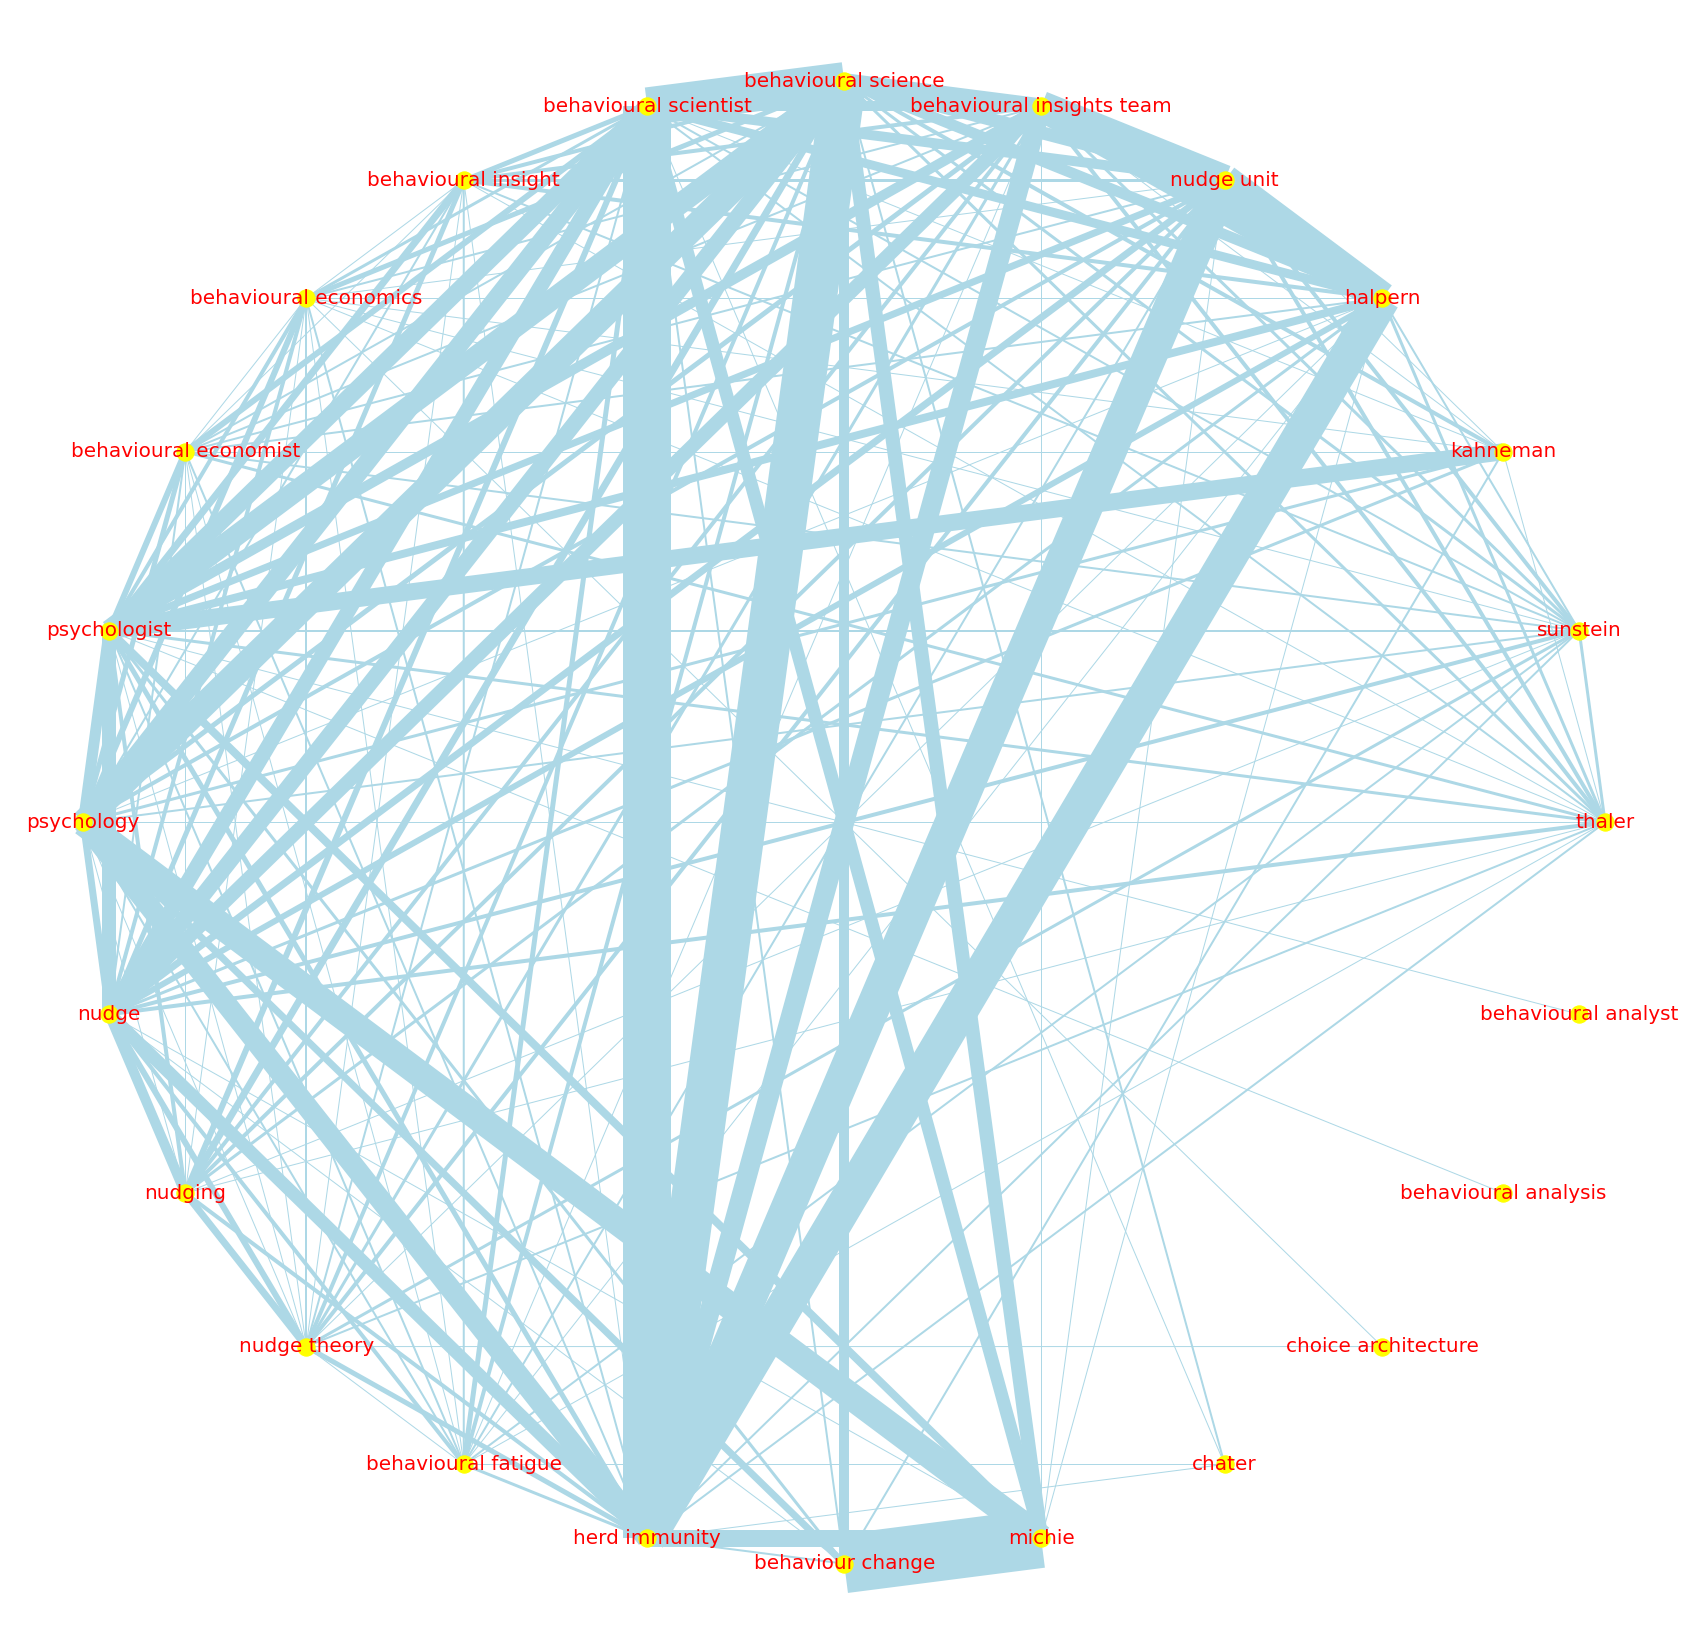

In [28]:
# let's make edges' width proportional to co-occurrence
fig, ax = plt.subplots(figsize=(30,30))   
nx.draw_circular(kword_graph, with_labels=True, 
                 width=weights, 
                 edge_color='lightblue',
                 node_color='yellow',
                 font_size=20,
                 font_color='red',
                 font_weight=2
                )

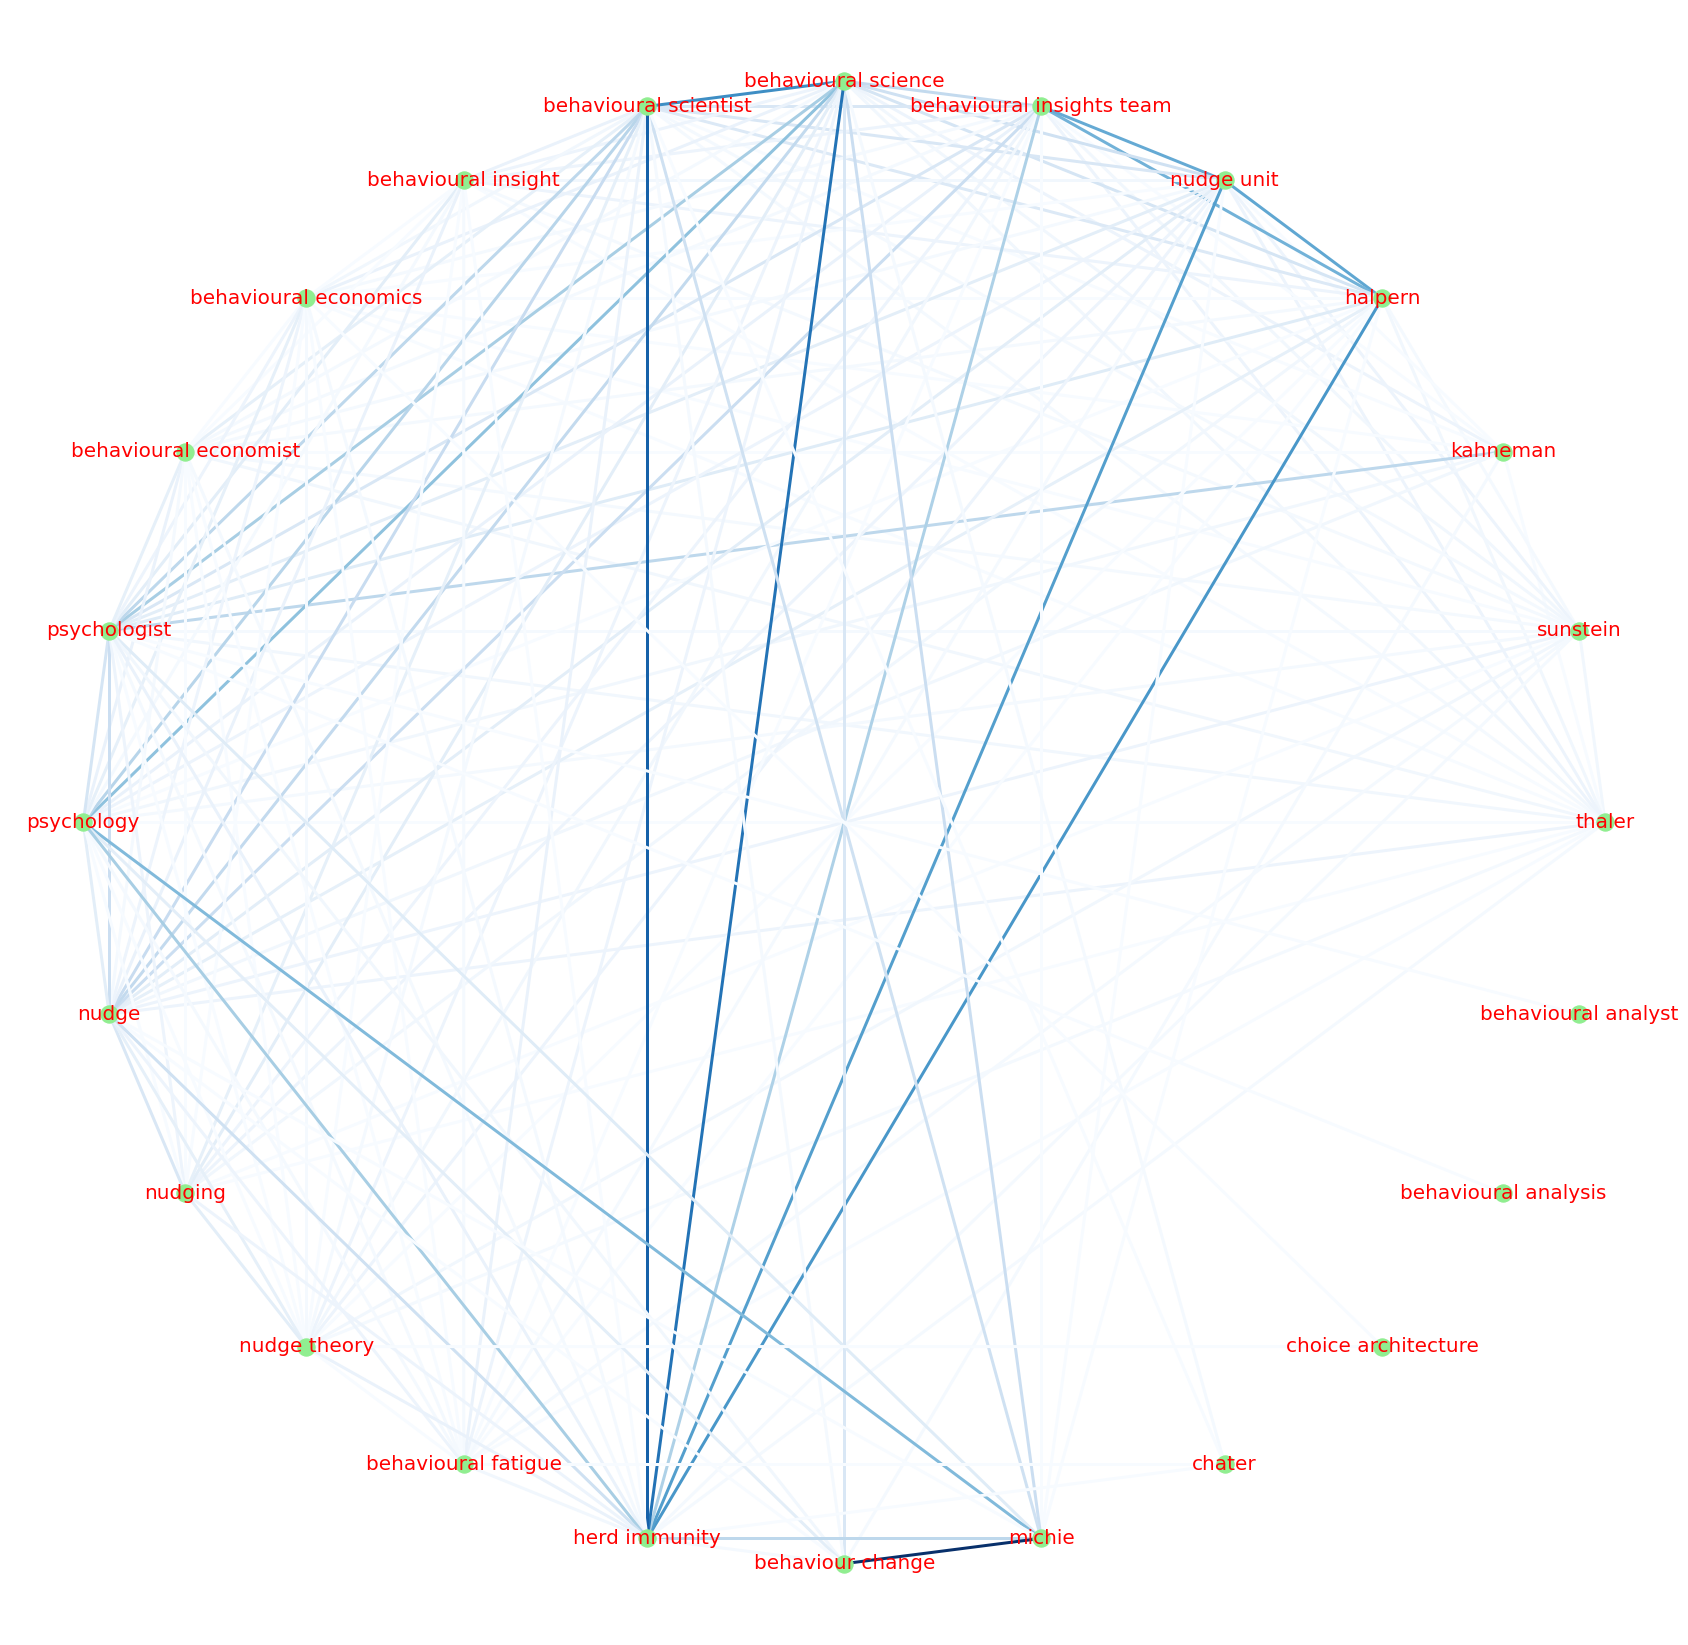

In [29]:
# this time with color of edges to mark co-occurrence
fig, ax = plt.subplots(figsize=(30,30))   
nx.draw_circular(kword_graph, 
                 with_labels=True, 
                 edge_color=weights,
                 width=3,
                 node_color='lightgreen',
                 font_size=20,
                 font_color='red',
                 font_weight=3,
                 edge_cmap=plt.cm.Blues
                )